In [15]:
# 1. Handle datasets
import io
import os
import cv2
import imageio
import pydicom
import dicomsdl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import tifffile as tiff
import SimpleITK as sitk
from pathlib import Path
from tqdm.auto import tqdm
import multiprocessing as mp
from collections import Counter
from joblib import Parallel, delayed
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [12]:
# RESIZE_TO = 512
# SAVE_DIR = f"train_image_processed_jp2000_{RESIZE_TO}"
parent_dir = r"E:\rsna-breast-cancer-detection"

# # Gather all .dcm paths
# all_dcm_files = list(Path(os.path.join(parent_dir, "train_images")).rglob("*.dcm"))
# fail_counter = Counter()

# def image_resize(image, width = None, height = None, inter = cv2.INTER_LINEAR):
    
#     dim = None
#     (h, w) = image.shape[:2]
    
#     if width is None and height is None:
#         return image

#     if width is None:
#         r = height / float(h)
#         dim = (int(w * r), height)
#     else:
#         r = width / float(w)
#         dim = (width, int(h * r))
    
#     resized = cv2.resize(image, dim, interpolation=inter)
#     return resized

# def apply_window(image, window_center, window_width):
#     img = image.copy().astype(np.float32)
#     min_val = window_center - window_width / 2
#     max_val = window_center + window_width / 2
#     img = np.clip(img, min_val, max_val)
#     img = (img - min_val) / (max_val - min_val)
#     return img

# def dicom_file_to_array(path):
#     dicom = dicomsdl.open(str(path))
#     data = dicom.pixelData().astype(np.float32)
#     photometric = dicom.getPixelDataInfo()['PhotometricInterpretation']  # Cache this once
    
#     if photometric == "MONOCHROME1":
#         data = data.max() - data
    
#     # ===== Windowing =====
#     try:
#         center = dicom.getMeta("0028|1050")  # Window Center
#         width = dicom.getMeta("0028|1051")   # Window Width
        
#         if isinstance(center, list):
#             center = float(center[0])
#         else:
#             center = float(center)
        
#         if isinstance(width, list):
#             width = float(width[0])
#         else:
#             width = float(width)
        
#         data = apply_window(data, center, width)
        
#     except Exception:
#         # Fall back to default normalization if window info is missing
#         data = (data - data.min()) / (data.max() - data.min())

#     # Resize    
#     h, w = data.shape
#     if w > h:
#         data = image_resize(data, width=RESIZE_TO)
#     else:
#         data = image_resize(data, height=RESIZE_TO)
    
#     return (data * 255).astype(np.uint8)

# def process(path):
#     try:
#         parent_folder = path.parent.name
#         save_subdir = os.path.join(parent_dir, SAVE_DIR, parent_folder)
#         os.makedirs(save_subdir, exist_ok=True)

#         processed_img = dicom_file_to_array(path)
#         save_path = os.path.join(save_subdir, f"{path.stem}.jp2")
#         imageio.imwrite(save_path, processed_img, format='JP2')

#     except Exception as e:
#         print(f"[ERROR] Failed: {path} — {e}")
#         fail_counter["fail"] += 1

# # Process with tqdm and joblib
# Parallel(n_jobs=16, backend="loky", prefer="threads")(
#     delayed(process)(path) for path in tqdm(all_dcm_files, 
#                                             total=len(all_dcm_files))
# )

# print(f"✅ Done! Processed {len(all_dcm_files)} images.")
# print(f"❌ Failed: {fail_counter['fail']}")

uint8


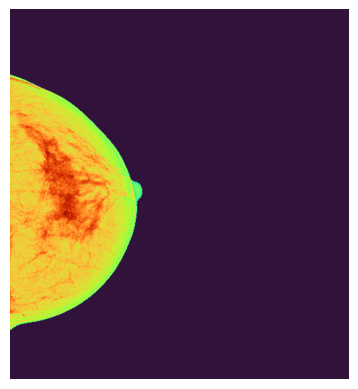

In [ ]:
def open_jpeg2000_image(image_path):
    # Read the JPEG2000 image using OpenCV
    img = plt.imread(image_path)
    
    plt.imshow(img, cmap="turbo")
    plt.axis('off')
    plt.show()

# Example usage
image_path = os.path.join(parent_dir, "train_image_processed_jp2000_512", "105", "397491913.jp2")
if os.path.exists(image_path):
    open_jpeg2000_image(image_path)
else:
    print("False")